Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Importing csv files

In [2]:
exercise = pd.read_csv('/content/exercise_data.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


In [3]:
calories = pd.read_csv('/content/calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
data = pd.concat([exercise,calories['Calories']],axis=1)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


Data Analysis

In [5]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [7]:
data.shape

(15000, 9)

In [8]:
data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [9]:
data.replace({'Gender':{'male':0,'female':1}},inplace=True)
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231.0
1,14861698,1,20,166,60,14,94,40.3,66.0
2,11179863,0,69,179,79,5,88,38.7,26.0
3,16180408,1,34,179,71,13,100,40.5,71.0
4,17771927,1,27,154,58,10,81,39.8,35.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  int64  
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [11]:
data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


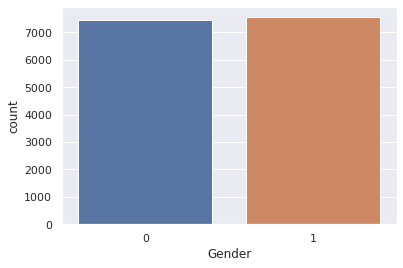

In [12]:
sns.set()
sns.countplot(data['Gender'])

In [16]:
data['Gender'].value_counts()

1    7553
0    7447
Name: Gender, dtype: int64

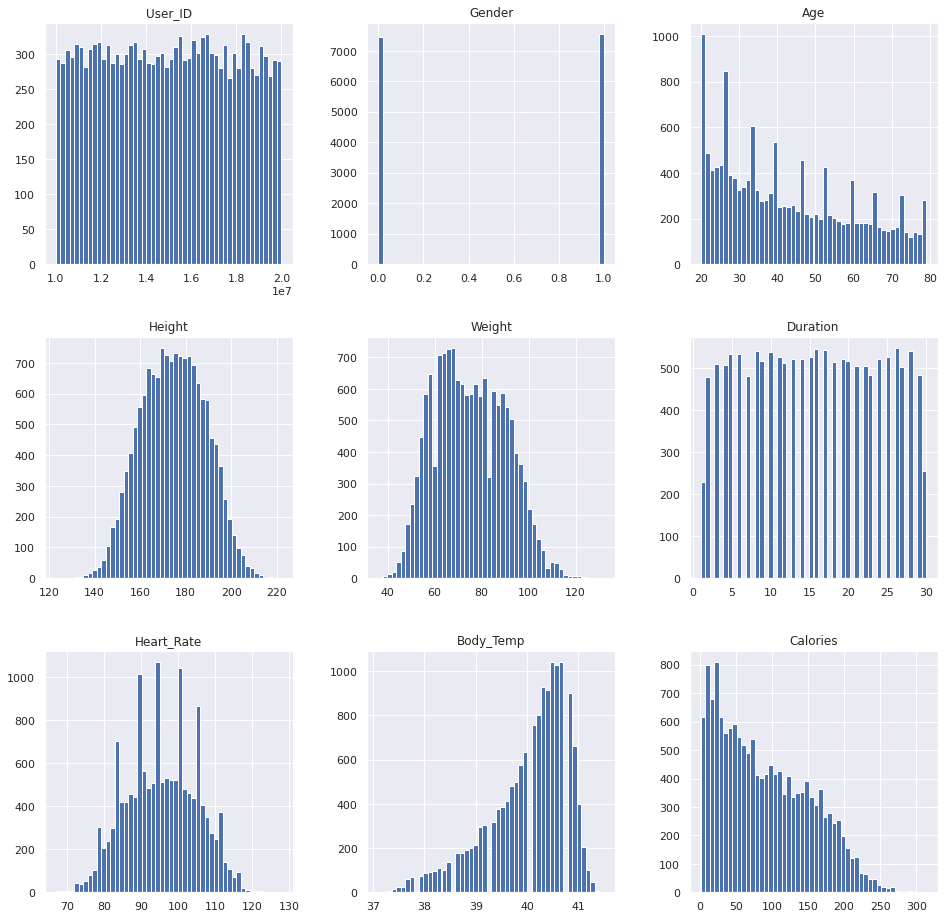

In [17]:
data.hist(bins=50,figsize=(16,16))
plt.show()

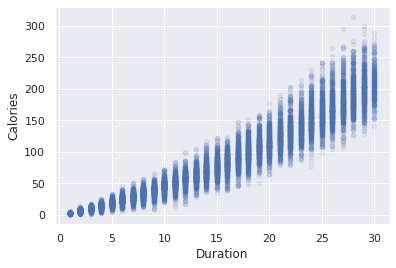

In [18]:
data.plot(kind='scatter',x="Duration",y="Calories",alpha=0.1)

We can see that as duration increases no of burned calories increases

Splitting the features and target

In [36]:
x = data.drop(columns=['User_ID','Calories','Heart_Rate','Body_Temp'],axis=1)
y = data['Calories']

In [37]:
print(x)

       Gender  Age  Height  Weight  Duration
0           0   68     190      94        29
1           1   20     166      60        14
2           0   69     179      79         5
3           1   34     179      71        13
4           1   27     154      58        10
...       ...  ...     ...     ...       ...
14995       1   20     193      86        11
14996       1   27     165      65         6
14997       1   43     159      58        16
14998       0   78     193      97         2
14999       0   63     173      79        18

[15000 rows x 5 columns]


In [38]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training and testing data

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [40]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 5) (12000, 5) (3000, 5)


In [41]:
print(y.shape,y_train.shape,y_test.shape)

(15000,) (12000,) (3000,)


Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)
lr_accuracy = lr.score(x_test,y_test)
print("Accuracy : ",lr_accuracy)

Accuracy :  0.9340306663400397


Random Forest

In [42]:
rf = RandomForestRegressor()

In [43]:
rf.fit(x_train,y_train)
rf_accuracy = rf.score(x_test,y_test)
print("Accuracy : ",rf_accuracy)

Accuracy :  0.9587291529945352


SVM

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
svc_accuracy = svc.score(x_test,y_test)
print("Accuracy : ",svc_accuracy)

Accuracy :  0.011333333333333334


Accuracy graph of 3 Algorithms

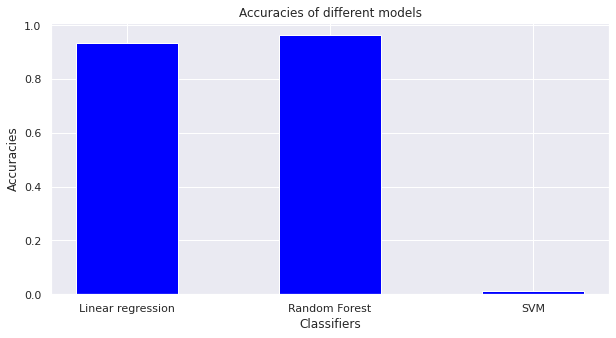

In [ ]:
data_dict = {'Linear regression':lr_accuracy,'Random Forest':rf_accuracy,'SVM':svc_accuracy}
x = list(data_dict.keys())
y = list(data_dict.values())
fig = plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue',width=0.5)
plt.xlabel('Classifiers')
plt.ylabel('Accuracies')
plt.title('Accuracies of different models')
plt.show()

In [44]:
test_data_pred = rf.predict(x_test)
pred_data = pd.DataFrame({'Actual':y_test,'Predicted':test_data_pred})
pred_data

,Actual,Predicted
7592,127.0,149.096667
3551,224.0,194.660000
9698,38.0,30.400000
3759,6.0,6.050000
2353,137.0,113.960000
...,...,...
8859,177.0,189.060000
2886,49.0,55.650000
14357,145.0,144.080000
9430,24.0,26.703333


In [45]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,test_data_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,test_data_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,test_data_pred)))

Mean Absolute Error: 8.777933943121694
Mean Squared Error: 162.096852049559
Root Mean Squared Error: 2.962757827282158


In [46]:
feature_list = x[x.columns]
print(feature_list)

       Gender  Age  Height  Weight  Duration
0           0   68     190      94        29
1           1   20     166      60        14
2           0   69     179      79         5
3           1   34     179      71        13
4           1   27     154      58        10
...       ...  ...     ...     ...       ...
14995       1   20     193      86        11
14996       1   27     165      65         6
14997       1   43     159      58        16
14998       0   78     193      97         2
14999       0   63     173      79        18

[15000 rows x 5 columns]


Building a Predictive System

In [47]:
def cal():
  input_data = (gender,age,height,weight,duration)

  input_data_as_array = np.asarray(input_data)

  input_data_reshaped = input_data_as_array.reshape(1,-1)

  prediction = rf.predict(input_data_reshaped)

  print("CALORIES YOU BURNED : ",prediction[0])

In [48]:
# id = input("Enter your ID : ")

gender = input("Enter your gender : ")

if(gender == "male"):
  gender = 0
elif(gender == "female"):
    gender = 1
else:
  print("enter valid input")

age = input("Enter your age : ")

height = input("Enter your height in cm : ")

weight = input("Enter your weight in kg : ")

duration = input("Enter no of minutes you worked out : ")

print()
cal()

Enter your gender : male
Enter your age : 20
Enter your height in cm : 160
Enter your weight in kg : 65
Enter no of minutes you worked out : 120

CALORIES YOU BURNED :  170.81


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
